
# Recommendations for sellers



---



विक्रेताओं के लिए सिफारिशें


---


<!-- ---


> *Click the button below and enter the required support & confidence*


> खालील बटणावर क्लिक करा आणि आवश्यक समर्थन आणि आत्मविश्वास प्रविष्ट करा

--- -->





In [0]:
#@title Procedure (प्रक्रिया)
%%html
<marquee style='width: 100%; color: red;'><b>Login to your Gmail account then Click the left button given below to load all input files and then select the appropriate inputs in each module to get respective output</b></marquee>
<div>
<marquee style='width: 100%; color: red;'><b>अपने Gmail खाते में लॉगिन करें और फिर सभी इनपुट फ़ाइलों को लोड करने के लिए नीचे दिए गए बाएं बटन पर क्लिक करें और फिर प्रत्येक आउटपुट प्राप्त करने के लिए प्रत्येक मॉड्यूल में उपयुक्त इनपुट का चयन करें</b></marquee>
</div>

In [0]:

#@markdown **Click the left button to load all required input files and enter 'A' if prompted **
#@markdown *सभी आवश्यक इनपुट फ़ाइलों को लोड करने के लिए बाएं बटन पर क्लिक करें और यदि संकेत दिया जाए तो  'A' दर्ज करें*
#to download the required input files&images served remotely
%%capture
!pip install gdown;
# #UploadFIles without latest nutrients area DS & unzip it directly
# !gdown https://drive.google.com/uc?id=1a82nSzdZ4dfHfd6Vw_J2B_J3FgcDJh29;
# !unzip -j UploadFiles.zip
#Latest nutrientsarea1 & hidden unzip
!gdown https://drive.google.com/uc?id=1RoDrmt-W-1qvxAGWbBYMz8J7eHKc4Z5t;
!unzip -j UploadFiles3.zip

'''
USE uc instead of open;
In gdrive share link with anyone can VIEW
'''



# Optimal Crop Recommendations


---




> इष्टतम फसल की सिफारिशें






---





Recommended crops for Varanasi in Rabi season are: 
  (चयनित मौसम में आपके क्षेत्र के लिए अनुशंसित फसलें हैं) 

Garlic,Potato,Raddish,Sannhamp,Barley,Khesari,Wheat,Sesamum
---------------------------------------------------------------------------------------

Garlic :


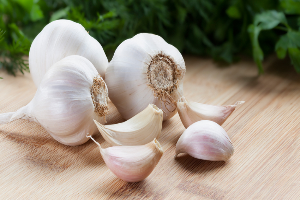

Potato :


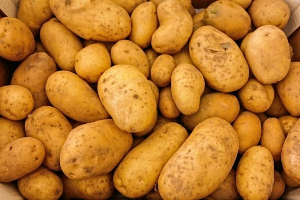

Raddish :


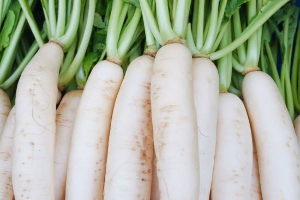

Sannhamp :


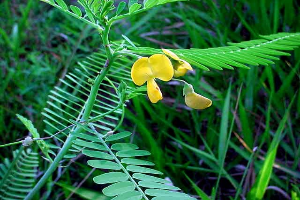

Barley :


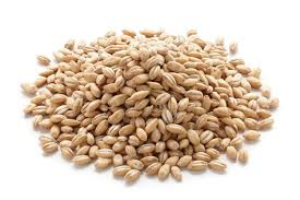

Khesari :


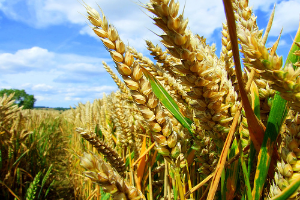

Wheat :


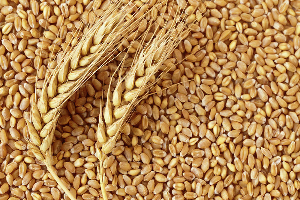

Sesamum :


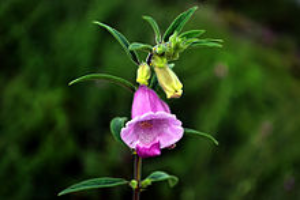

In [0]:
#@markdown **अपने क्षेत्र और मौसम का चयन करें जिसके लिए आपको सिफारिशें चाहिए और सिफारिशें प्राप्त करने के लिए बाएं बटन पर क्लिक करें**

#@markdown *Select your area & season for which you want recommendations*
#@markdown **Click the left button to get recommendations**

'''
--------------------------
author- Rahul Patki
---------------------------
'''

'''
Dropdowns
'''
Area = "Varanasi " #@param ["Bangalore ", "Bareilly ", "Bhatinda ", "Coimbatore ", "DehraDun ", "Guwahati ", "Jabalpur ", "Jammu ", "Kolkata ", "Mangalore ", "Mysore ", "Panjim ", "PortBlair ", "Pune ", "Rajkot ", "Ranchi ", "Shimla ", "Srinagar ", "Thiruvananthapuram ", "Varanasi "]
Season = "Rabi" #@param ["All", "Kharif", "Rabi"]


#imports#
'''
Here all required files are imported
'''
import csv
import datetime
import sys
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


#variable declaration#
'''
Global
'''
now = datetime.datetime.now()
month=now.month
#month=6 #dummy month for june
area=""
temp=[]
temp_final=[]
rain_fall=[]
rainfall_final=[]
prevtemp=0
prevrainfall=0
#declaring season
season = ""

#get area from dropdown#

area= Area

#get season from dropdown

season = Season
KharifList = [
'Urad','Papaya','Orange','Mesta','Lady Finger','Ginger','Banana','Jute','Rice','Maize','Bajra','Jowar','Ragi','Moong(Green Gram)','Blackgram','Bean','Soyabean','Guar seed','Cowpea','Groundnut','Castor seed','Cotton','Sugarcane','Turmeric','Chillies','Bottle Gourd','Brinjal','Drum Stick'
]

RabiList = [
    'Raddish','Sweet potato','Lentil','Grapes','Tomato','Carrot','Wheat','Barley','Peas & beans (Pulses)','Moth','Safflower','Linseed','Sesamum','Coriander','Potato','Onion','Garlic','Sannhamp','Cabbage','Cauliflower','Khesari'
]

# #For manual state
# area= 'Bangalore '
# state='Maharashtra'

'''
appended extra column state in temprainfall because nutrients data is in terms of state
'''
 
#areas temp and rain#

'''
get temprainfall.csv--headers=[stationname,month,temp-min,max,rainfall];
find sel. dropdown area and append it's resp. state from dataset by setting a flag & foreach MONTH:-
  calculate mean temperature=min+max/2 & append values upto 2 decimal places to temp list;
  append rainfall data one by one month to rainfall list;

'''
with open('temprainfall.csv') as csvfile:
    #print('this is area:'+area)
    reader = csv.reader(csvfile)
    flag=0
    
    for row in reader:
        #print "this is area:", area
        if row[0] == area:
           #print "this is area:", area
           #print(row)
           if flag==0:
               state=row[1]
               flag=1
           temperature=(float(row[3])+float(row[4]))/2
           temp.append(round(temperature,2))
           rain_fall.append(float(row[5])) 
#            print('Temp mean is:' + str(temp))
#            print('Rain_fall is:'+ str(rain_fall))
csvfile.close 
#return state           
#state=temperature()



#temp,rainfall in area according to current userMonth#
'''
index gets list index from month.now();
calculate and populate final temperature,rainfall:
  prevtemp,rainfall are used as temporary var to fetch tempavg,rainfall from temp,rain_fall LIST
  for selected area from the current month,to (weighted sum/no.of months) for all months

'''
def rainfall(temp_final,rainfall_final,temp,rain_fall):    
    index=month-1
    prevtemp=0
    prevrainfall=0
    
    
    for i in range (1,13):
        
        prevtemp=prevtemp+temp[index]
        temp_final.append(round((prevtemp/i),2))
        prevrainfall=prevrainfall+rain_fall[index]
        rainfall_final.append(round(prevrainfall,2))
        index= index+1
        if index==12:
            index=0      
#     print('temp_final per month: '+str(temp_final))
#     print('rainfall final per month: '+str(rainfall_final))



#nutrient conversion function#

'''
convert the 5 labels in data to integral values and return those values to compare
'''

def conv(nutrient):
    nutrient_dict={'VL':1,'L':2,'M':3,'H':4,'VH':5 }
    return  nutrient_dict.__getitem__(nutrient)

  
#get nutrients of farmers area

'''
nutrientsarea is processed DS,v1 is original;headers=[state,n,p,k,ph];
input state is taken and n,p,k,ph for that state is found in DS & passed to convert fn;
In cropDB--headers[crop,duration,min.temp,max.temp,min.ph,max.ph,min.rain,max.rain,n,p,k];
cropDB has data regarding crop requiremnets;
From crop convt. n,p,k and compare the value with state's int(n,p,k):
  if statevalue>= cropvalue--select those crops and append their data in metacrops;
Consider ONLY metacrops for ML
'''
def nutrients(state,rainfall_final,temp_final):
    try:
        #print('this is state:'+state)
        with open('nutrientsarea1.csv', 'r') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
               if row[0] == state:
                   narea=conv(row[1])
                   parea=conv(row[2])
                   karea=conv(row[3])
                   ph=row[4]
                  
#                    print(narea)
#                    print(parea)
#                    print(karea)
#                    print(ph)
                   
    except IOError:
       print ("No file exists named nutrientsarea.csv")
       sys.exit("The required file does not exist!!!")               
    csvfile.close

    #nutrient based filter of crops
    try:
        
        with open('cropDB.csv', 'r') as csvfile, open('metacrops.csv', 'w') as metacrops:
            reader = csv.reader(csvfile)
            #writer=csv.writer(metacrops)
            metacrops.writelines("Crop, Rainfall, Temperature, pH \n")
            for row in reader:
               ncrop=conv(row[8])
               pcrop=conv(row[9])
               kcrop=conv(row[10])
               if(narea>=ncrop and parea>=pcrop and karea>=kcrop):
                   #swriter.writerows(row)
                   no_months=int(row[1])
                   #print("this in no months",no_months)
                   total=row[0]+","+str(rainfall_final[no_months-1])+","+str(temp_final[no_months-1])+","+ph+"\n"
                   metacrops.writelines(total)
                   #print total
    except IOError:
       print ("No file exists named cropDB.csv")
       sys.exit("The required file does not exist!!!")     
    csvfile.close
    metacrops.close 





#replicate metacrop#
'''
simply replicate metacrops without respective headers
'''
def filewrite():
    n=1
    try:
        with open("metacrops.csv",'r') as f:
            with open("metacrops11.csv", "w") as f1:
                for line in f:
                    if n==1:
                        n=n+1
                        continue
                    f1.write(line)
    except IOError as e:
            print ("I/O error({0}): {1}".format(e.errno, e.strerror))
            sys.exit("No such file exists")
    f.close
    f1.close  




            
#MultiLinearRegresion# 
'''
read csv:
  #regDB--heaers=[rain,temp,ph,crop,(prod/area)]
  #metacrops11--header=[crop,rain,temp,ph];
loc(crop)-Access a group of columns by label(crop) for detemining values on this crop ;
get those Crops data frm regressionDB whose labels match crops in metacrops(nutrient based assorted);
  train(all except last 2 columns(crop,prod/area))
  AND test(prod/area);answer of test will be for "crop labels" kept as is;
perform ttsplit-90% train & fit;
sort and print;

'''
def regression():
 
    n=0
    crop_Y_pred=[]
    crop_name=[]
    dataset=pd.read_csv('regressiondb.csv')
    locbased=pd.read_csv('metacrops.csv')
    
    try:
       with open('metacrops11.csv', 'r') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
               crop=row[0]
        
               metadata=dataset.loc[dataset['Crop'] == crop]
               X = metadata.iloc[:, :-2].values
               Y = metadata.iloc[:, 4].values
               
               ##fitting MLR to training set  
               ##regressor = LinearRegression()
               ##regressor.fit(X, Y)
              
               X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)
               regressor = LinearRegression()
               regressor.fit(X_train, Y_train)  
               
               #predecting test set results
               '''Y_pred_test = regressor.predict(X_test)
               print("this is Y test:", Y_test)
               print "\n"
               print("this is Y predicted:", Y_pred_test) '''
       
               #predecting final set results
               X_locbased = locbased.loc[[n]].values #take all except 0th col that is crop name
               X_locbased = X_locbased[:, 1:4]
               Y_pred=regressor.predict(X_locbased)
               
               if Y_pred>0:
                   crop_Y_pred.append(round(Y_pred[0],3))
                   crop_name.append(crop)
                                     
       #print(crop_name,crop_Y_pred)
       sorted_crops=quicksort(crop_name,crop_Y_pred,0,len(crop_Y_pred)-1)                       
       csvfile.close
       #return pred_crop
       return sorted_crops
   
    except (IOError):
        print ('No file exists named metacrops11.csv')
        sys.exit("No such file exists")
    os.remove('metacrops.csv')       
    os.remove('metacrops11.csv')




        
#sorting fn                   
def quicksort(crop_name,crop_Y_pred,start, end):
    if start < end:
        # partition the list
        pivot = partition(crop_name,crop_Y_pred, start, end)
        # sort both halves
        quicksort(crop_name,crop_Y_pred, start, pivot-1)
        quicksort(crop_name,crop_Y_pred, pivot+1, end)
    return crop_name

#partition function
def partition(crop_name,crop_Y_pred, start, end):
    pivot = crop_Y_pred[start]
    left = start+1
    right = end
    done = False
    while not done:
        while left <= right and crop_Y_pred[left] >= pivot:
            left = left + 1
        while crop_Y_pred[right] <= pivot and right >=left:
            right = right -1
        if right < left:
            done= True
        else:
            # swap places Y_pred
            temp=crop_Y_pred[left]
            crop_Y_pred[left]=crop_Y_pred[right]
            crop_Y_pred[right]=temp
            
            # swap places Y_crop
            temp1=crop_name[left]
            crop_name[left]=crop_name[right]
            crop_name[right]=temp1
            
    # swap start with myList[right]
    temp=crop_Y_pred[start]
    crop_Y_pred[start]=crop_Y_pred[right]
    crop_Y_pred[right]=temp
    
    # swap start with myList[right] for crop 
    temp1=crop_name[start]
    crop_name[start]=crop_name[right]
    crop_name[right]=temp1
        
    return right    


  
#conv crop list to string
def ListtoStr(sorted_crop):
    pred_crop = ""
    comma_flag=0
    no=len(sorted_crop)
    if(no>10):
        no=10
    for i in range (no):
        if comma_flag==1:
            pred_crop=pred_crop+","
                       
        pred_crop= pred_crop + sorted_crop[i]
        comma_flag=1
    return pred_crop



  
#DRIVER CODE
if __name__ == '__main__':

    rainfall(temp_final,rainfall_final,temp,rain_fall)
    nutrients(state,rainfall_final,temp_final)
    filewrite()
    sorted_crop=regression()
    #print(sorted_crop)#list
    finalStr = " "
    finalList = []
    # for assorted seasonal recommendations:
    if season == 'Kharif' :
      for i in sorted_crop:
        if i in KharifList:
          finalStr += i + ','
          finalList.append(i)
        else:
          continue
      final_crop=ListtoStr(finalList)
      #print(finalStr)
      #final_crop = finalStr
      
    elif season == 'Rabi' :
      for i in sorted_crop:
        if i in RabiList:
          finalStr+= i + ','
          finalList.append(i)
        else:
          continue
      final_crop=ListtoStr(finalList)
      #print(finalStr)
      #final_crop = finalStr
      
    else:
      final_crop=ListtoStr(sorted_crop)
    
    #final_crop=ListtoStr(sorted_crop)
    
    print('Recommended crops for ' + str(Area)+'in ' +str(Season)+' season are: ' )
    print("  (चयनित मौसम में आपके क्षेत्र के लिए अनुशंसित फसलें हैं) "+"\n")
    print (final_crop)
#-----------------------------------------------------------------------------#
    

  
#get and display images for predicted items#  

print("---------------------------------------------------------------------------------------"+"\n")
##to get and display image
from google.colab.patches import cv2_imshow
import cv2

#!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png 
#img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
#img = cv2.resize(img, (300, 200))
# cv2_imshow(img)


if Season == 'All':
  for i in (sorted_crop):
      s=str(i)+'.jpg'
      print(str(i)+' :')
      im = cv2.imread(s, cv2.IMREAD_UNCHANGED)
      img = cv2.resize(im, (300, 200))
      cv2_imshow(img)
else:
  for i in (finalList):
      s=str(i)+'.jpg'
      print(str(i)+' :')
      im = cv2.imread(s, cv2.IMREAD_UNCHANGED)
      img = cv2.resize(im, (300, 200))
      cv2_imshow(img)

    
    
    
    
    
    

#Transaction Based Recommendations 
#(लेनदेन आधारित सिफारिशें)

In [0]:
#@title Warning! (चेतावनी!)
%%html
<marquee style='width: 100%; color: red;'><b>Recommendations given below are purely based on user trends on our website!!!</b></marquee>
<div>
<marquee style='width: 100%; color: red;'><b>नीचे दी गई सिफारिशें विशुद्ध रूप से हमारी वेबसाइट पर उपयोगकर्ता के रुझान पर आधारित हैं !!!</b></marquee>
</div>

In [0]:

#@markdown *Click the left button to get new recommendations*
#@markdown **नई सिफारिशें प्राप्त करने के लिए बाएं बटन पर क्लिक करें**
import pandas as pd
import itertools
#   This function generates the first candidate set using the dataset
def generateC1(dataSet):
    productDict = {}
    returneSet = []
    for data in dataSet:
        for product in data:
            if product not in productDict:
               productDict[product] = 1
            else:
                 productDict[product] = productDict[product] + 1
    for key in productDict:
        tempArray = []
        tempArray.append(key)
        returneSet.append(tempArray)
        returneSet.append(productDict[key])
        tempArray = []
    return returneSet

#   This function creates Frequent item sets by taking candidate sets as input
#   At the end, this function calls generateCandidatSets by feeding the output of the
#   current function as the input of the other function
def generateFrequentItemSet(CandidateList, noOfTransactions, minimumSupport, dataSet, fatherFrequentArray):
    frequentItemsArray = []
    for i in range(len(CandidateList)):
        if i%2 != 0:
            support = (CandidateList[i] * 1.0 / noOfTransactions) * 100
            if support >= minimumSupport:
                frequentItemsArray.append(CandidateList[i-1])
                frequentItemsArray.append(CandidateList[i])
            else:
                eleminatedItemsArray.append(CandidateList[i-1])

    for k in frequentItemsArray:
        fatherFrequentArray.append(k)

    if len(frequentItemsArray) == 2 or len(frequentItemsArray) == 0:
        #print("This will be returned")
        returnArray = fatherFrequentArray
        return returnArray

    else:
        generateCandidateSets(dataSet, eleminatedItemsArray, frequentItemsArray, noOfTransactions, minimumSupport)

#   This function creates Candidate sets by taking frequent sets as the input
#   At the end, this function calls generateFrequentItemSets by feeding the output of the
#   crrent function as the input of the other function
def generateCandidateSets(dataSet, eleminatedItemsArray, frequentItemsArray, noOfTransactions, minimumSupport):
    onlyElements = []
    arrayAfterCombinations = []
    candidateSetArray = []
    for i in range(len(frequentItemsArray)):
        if i%2 == 0:
            onlyElements.append(frequentItemsArray[i])
    for item in onlyElements:
        tempCombinationArray = []
        k = onlyElements.index(item)
        for i in range(k + 1, len(onlyElements)):
            for j in item:
                if j not in tempCombinationArray:
                    tempCombinationArray.append(j)
            for m in onlyElements[i]:
                if m not in tempCombinationArray:
                    tempCombinationArray.append(m)
            arrayAfterCombinations.append(tempCombinationArray)
            tempCombinationArray = []
    sortedCombinationArray = []
    uniqueCombinationArray = []
    for i in arrayAfterCombinations:
        sortedCombinationArray.append(sorted(i))
    for i in sortedCombinationArray:
        if i not in uniqueCombinationArray:
            uniqueCombinationArray.append(i)
    arrayAfterCombinations = uniqueCombinationArray
    for item in arrayAfterCombinations:
        count = 0
        for transaction in dataSet:
            if set(item).issubset(set(transaction)):
                count = count + 1
        if count != 0:
            candidateSetArray.append(item)
            candidateSetArray.append(count)
    generateFrequentItemSet(candidateSetArray, noOfTransactions, minimumSupport, dataSet, fatherFrequentArray)

#   This function takes all the frequent sets as the input and generates Association Rules
def generateAssociationRule(freqSet):
    associationRule = []
    for item in freqSet:
        if isinstance(item, list):
            if len(item) != 0:
                length = len(item) - 1
                while length > 0:
                    combinations = list(itertools.combinations(item, length))
                    temp = []
                    LHS = []
                    for RHS in combinations:
                        LHS = set(item) - set(RHS)
                        temp.append(list(LHS))
                        temp.append(list(RHS))
                        #print(temp)
                        associationRule.append(temp)
                        temp = []
                    length = length - 1
    return associationRule

#   This function creates the final output of the algorithm by taking Association Rules as the input
def aprioriOutput(rules, dataSet, minimumSupport, minimumConfidence):
    returnAprioriOutput = []
    for rule in rules:
        supportOfX = 0
        supportOfXinPercentage = 0
        supportOfXandY = 0
        supportOfXandYinPercentage = 0
        for transaction in dataSet:
            if set(rule[0]).issubset(set(transaction)):
                supportOfX = supportOfX + 1
            if set(rule[0] + rule[1]).issubset(set(transaction)):
                supportOfXandY = supportOfXandY + 1
        supportOfXinPercentage = (supportOfX * 1.0 / noOfTransactions) * 100
        supportOfXandYinPercentage = (supportOfXandY * 1.0 / noOfTransactions) * 100
        confidence = (supportOfXandYinPercentage / supportOfXinPercentage) * 100
        if confidence >= minimumConfidence:
          #The below statements can be uncommented to get the output in the form:Support Of X: 72.0  Support Of X&Y: 82.0  Confidence: 72  ['Rajma']------>['Sugarcane']
          #Further set "counter = 4" for the same!
            #supportOfXAppendString = "Support Of X: " + str(round(supportOfXinPercentage, 2))
            #supportOfXandYAppendString = "Support of X & Y: " + str(round(supportOfXandYinPercentage))
            #confidenceAppendString = "Confidence: " + str(round(confidence))

            #returnAprioriOutput.append(supportOfXAppendString)
            #returnAprioriOutput.append(supportOfXandYAppendString)
            #returnAprioriOutput.append(confidenceAppendString)
            returnAprioriOutput.append(rule)

    return returnAprioriOutput

#   These few statements are taking input from the user 
#       Such as:
#           Select a database to mine the data
#           Minimum Support
#           Mnimum Confidence
# print("Select from the following dataset:")
# print("1. Crops")
# print("2. Farming Automobile Accessories")
# print("3. Other Farming Stuff")
# print("\n")
##user defined file,minsup,conf--uncomment below
#fileNameInput = input("Enter number (1,2,3): ")
# minimumSupport = input('Enter minimum Support (base 10): ')
# minimumConfidence = input('Enter minimum Confidence (base 10): ')
minimumSupport = 50
minimumConfidence = 75

print("\n") 
#fileName = "crops.txt"

# if fileNameInput == '1':
#     fileName = "crops.txt"
# if fileNameInput == '2':
#     fileName = "automobileStuff.txt"
# if fileNameInput == '3':
#     fileName = "otherStuff.txt"



minimumSupport = int(minimumSupport)
minimumConfidence = int(minimumConfidence)

nonFrequentSets = []
allFrequentItemSets = []
tempFrequentItemSets = []
dataSet = []
eleminatedItemsArray = []
noOfTransactions = 0
fatherFrequentArray = []
something = 0


# #   Reading the data file line by line
# with open(fileName,'r') as fp:
#     lines = fp.readlines()

#Reading the data file from google drive
with open('crops.txt', 'r') as fp:
  lines = fp.readlines()
for line in lines:
    line = line.rstrip()
    dataSet.append(line.split(","))

# #reading file from github for error removal
# url='https://drive.google.com/file/d/1Ui-RujPDs-r-GyH2w_oZp1BnmuojNyL7/view?usp=sharing'
# dataSet = pd.read_csv(url)
# print(dataSet)   
    
    
noOfTransactions = len(dataSet)

firstCandidateSet = generateC1(dataSet)

frequentItemSet = generateFrequentItemSet(firstCandidateSet, noOfTransactions, minimumSupport, dataSet, fatherFrequentArray)

associationRules = generateAssociationRule(fatherFrequentArray)

AprioriOutput = aprioriOutput(associationRules, dataSet, minimumSupport, minimumConfidence)


counter = 1
if len(AprioriOutput) == 0:
    print("There are no association rules for this support and confidence.")
else:
    for i in AprioriOutput:
        if counter == 1:
            print(str(i[0]) + " ---> " + str(i[1]))
            counter = 0
        else:
            print(i, end='  ')
        counter = counter + 1
#!python3 AprioriAlgorithm.py -f crops.txt
#!python3 AprioriAlgorithm.py





['Ginger'] ---> ['Brinjal']
['Lal-Imli-Wheat'] ---> ['Brinjal']
['Rice'] ---> ['Brinjal']
['Potato'] ---> ['Brinjal']
['Mp-Sortex-Wheat'] ---> ['Ginger']
['Ginger'] ---> ['Mp-Sortex-Wheat']
['Lal-Imli-Wheat'] ---> ['Ginger']
['Rice'] ---> ['Potato']


#Explanation 
# सिफारिशों के नियमों की व्याख्या



---


English:
> ['Wheat']------>['Rice']

> The above rule means, crops at the left hand side of    "---->" are list of crops that are currently sold by farmers while crops on the right hand side of "---->" are recommended crops that can be sold together with crops on left side to gain maximum profit.




> Thus according to above rule if you sell 'wheat' currently then you can sell 'rice' along with it, as there is high demand for rice with wheat.

---




हिंदी:



> ['गेहूं'] ------> ['चावल']

> उपरोक्त नियम का अर्थ है, "------>" के बायीं ओर की फसलें उन फसलों की सूची है जो वर्तमान में किसानों द्वारा बेची जाती हैं, जबकि "------>" के दाहिने हाथ में फसलें हैं अधिकतम लाभ प्राप्त करने के लिए दूसरे पक्ष के फसलें के साथ मिलकर बेचा जा सकता है।




> इस प्रकार उपरोक्त नियम के अनुसार यदि आप वर्तमान में 'गेहूं' बेचते हैं तो आप इसके साथ 'चावल' भी बेच सकते हैं, क्योंकि गेहूँ के साथ चावल की माँग अधिक है।



---






# Video Recommendations
#वीडियो सिफारिशें

In [0]:
#@title Best Practices(सर्वोत्तम प्रथाएं)

%%html



<marquee style='width: 100%; color: blue;'><b>Get video recommendations & best practices about farming from peers!</b></marquee>

<marquee style='width: 100%; color: blue;'><b>सहकर्मी किसानों से खेती के बारे में वीडियो सिफारिशें और सर्वोत्तम अभ्यास प्राप्त करें!</b></marquee>

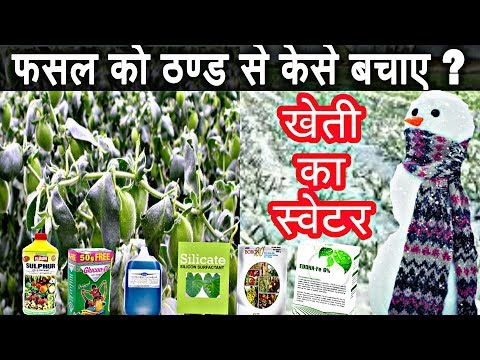

In [0]:
#@markdown This video tells how to protect any crop during winter
#@markdown यह वीडियो बताता है कि सर्दियों के दौरान किसी भी फसल की रक्षा कैसे करें:
from IPython.display import YouTubeVideo
YouTubeVideo('fSpFcALshbc', width=300, height=200)

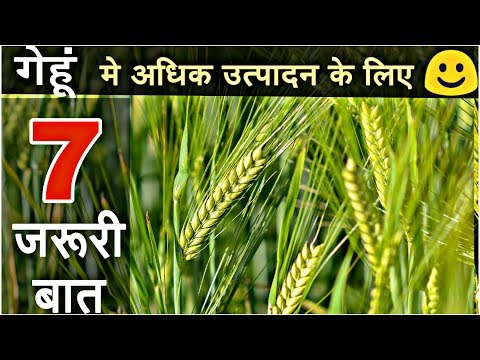

In [0]:
#@markdown This video gives Best farming tips for more production of wheat crop:
#@markdown यह वीडियो गेहूं की फसल के अधिक उत्पादन के लिए सर्वश्रेष्ठ खेती के टिप्स देता है:
from IPython.display import YouTubeVideo
YouTubeVideo('_ULc_pkwMPA', width=300, height=200)
